In [1]:
import os

import cv2
import pandas as pd

import matplotlib.pyplot as plt

from utils import init_paths

In [8]:
data = init_paths(data_folder="/original-data")

In [15]:
for path in data["FOLDERS_WITH_DATA"]:
    if not os.path.exists(path.replace("original-data", "labels")) and path != "/":
        os.mkdir(path.replace("original-data", "labels"))

# video

In [3]:
metadata = []
for path in data["PATH_TO_VIDEOS"]:
    capture = cv2.VideoCapture(path)
    metadata.append(
        {
            "title": os.path.basename(path),
            "frame_count": int(capture.get(cv2.CAP_PROP_FRAME_COUNT)),
            "frame_width": int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)),
            "frame_height": int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)),
            "fps": int(capture.get(cv2.CAP_PROP_FPS )),
            "path": os.path.relpath(path)
        } 
    )

In [4]:
metadata = pd.DataFrame(metadata)

In [5]:
metadata.index = metadata.title
metadata = metadata.drop(["title"], axis=1)

In [6]:
metadata

,frame_count,frame_width,frame_height,fps,path
title,,,,,
video 19.2.66.10 - Cam-MBT-14 04.11.23 13.25.00-13.30.00.mp4,2104,1280,960,7,original-data/Южно-Сахалинск Панорама/video 19...
video 19.2.66.9 - C-20-63 04.11.23 12.27.00-12.32.00.mp4,7521,1920,1080,25,original-data/Южно-Сахалинск Панорама/video 19...
video 19.2.66.9 - C-39-58 04.11.23 12.27.00-12.32.00.mp4,7515,1920,1080,25,original-data/Южно-Сахалинск Панорама/video 19...
video 19.2.66.9 - C-41-40 04.11.23 11.27.00-11.32.00.mp4,7520,1920,1080,25,original-data/Южно-Сахалинск Панорама/video 19...
video 19.2.66.10 - Cam-supermarket-123 04.11.23 10.29.00-10.34.00.mp4,4540,1280,960,15,original-data/Южно-Сахалинск Панорама/video 19...
...,...,...,...,...,...
video 19.3.252.10 - cam39 07.10.23 12.55.00-13.05.00.mp4,14770,1920,1080,24,original-data/Вл-к Гоголя/video 19.3.252.10 - ...
video 19.3.252.10 - cam99 07.10.23 16.55.00-17.07.40.mp4,11337,2592,1944,14,original-data/Вл-к Гоголя/video 19.3.252.10 - ...
video 19.3.252.10 - cam71 07.10.23 17.00.00-17.10.00.mp4,14753,1920,1080,24,original-data/Вл-к Гоголя/video 19.3.252.10 - ...


In [7]:
metadata.describe()

,frame_count,frame_width,frame_height,fps
count,737.000000,737.000000,737.000000,737.000000
mean,5468.340570,1555.625509,945.508820,15.936228
std,2406.483065,386.115170,254.269762,5.005704
min,21.000000,1280.000000,720.000000,7.000000
25%,4503.000000,1280.000000,720.000000,14.000000
50%,4533.000000,1280.000000,960.000000,15.000000
75%,7504.000000,1920.000000,1080.000000,15.000000
max,15927.000000,2592.000000,1944.000000,25.000000


In [8]:
metadata["frame_count"].sum()

4030167

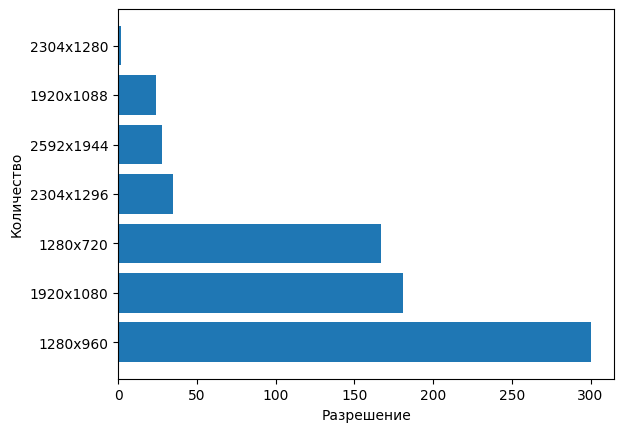

In [14]:
width_height = pd.Series([f"{w}x{h}" for w, h in zip(metadata["frame_width"], metadata["frame_height"])])
plt.barh(width_height.unique(), width=list(width_height.value_counts()))
plt.xlabel("Разрешение")
plt.ylabel("Количество")
plt.show()

In [40]:
metadata["fps"].unique()

array([ 7, 25, 15, 24, 14,  9, 11, 12, 10, 13])

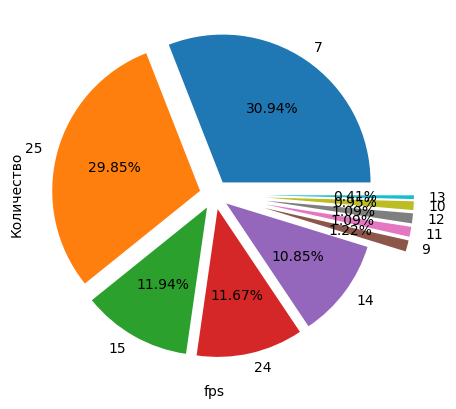

In [42]:
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.35, 0.35, 0.35, 0.35, 0.35)
plt.pie(list(metadata["fps"].value_counts()), labels=metadata["fps"].unique(), autopct='%1.2f%%', explode=explode)
plt.xlabel("fps")
plt.ylabel("Количество")
plt.show()

In [43]:
width_height.describe()

count          737
unique           7
top       1280x720
freq           300
dtype: object

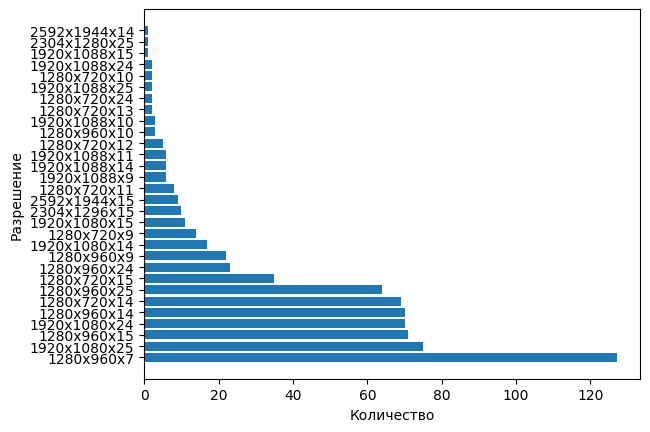

In [44]:
width_height_fps = pd.Series([f"{w}x{h}x{f}" for w, h, f in zip(metadata["frame_width"], metadata["frame_height"], metadata["fps"])])
plt.barh(width_height_fps.unique(), width=list(width_height_fps.value_counts()))
plt.ylabel("Разрешение")
plt.xlabel("Количество")
plt.show()

In [45]:
crashed = metadata[(metadata["frame_count"] == 1) | (metadata["fps"] == 0)]["path"]
crashed.count()

0

In [ ]:
crashed.to_csv("./data/crashed.csv", sep=";")

In [25]:
import os
for path in crashed:
    os.remove(path)

In [47]:
metadata = metadata[(metadata["frame_count"] != 1) | (metadata["fps"] != 0)]
metadata.to_csv("./original-data/metadata_video.csv", sep=";")

# img

In [48]:
metadata = []
for path in data["PATH_TO_IMGS"]:
    img = cv2.imread(path)
    try:
        metadata.append(
            {
                "title": os.path.basename(path),
                "width": img.shape[0],
                "height": img.shape[1],
                "color channels": img.shape[2],
                "path": os.path.relpath(path)
            }
        )
    except:
        print(path)

In [49]:
metadata = pd.DataFrame(metadata)
metadata.index = metadata.title
metadata = metadata.drop(["title"], axis=1)

In [50]:
metadata

,width,height,color channels,path
title,,,,
snapshot cam29-01_12_23_12_01_22.png,960,1280,3,original-data/Артем Пушкина/snapshot cam29-01_...
snapshot cam67-15_11_23_18_01_37.png,960,1280,3,original-data/Артем Пушкина/snapshot cam67-15_...
snapshot cam11-15_11_23_09_59_08.png,960,1280,3,original-data/Артем Пушкина/snapshot cam11-15_...
snapshot cam13-29_11_23_19_38_30.png,960,1280,3,original-data/Артем Пушкина/snapshot cam13-29_...
snapshot cam11-17_11_23_10_03_46.png,960,1280,3,original-data/Артем Пушкина/snapshot cam11-17_...
...,...,...,...,...
snapshot CAM55-27_11_23_19_23_27.png,960,1280,3,original-data/Вл-к Гоголя/snapshot CAM55-27_11...
snapshot CAM56-19_11_23_12_05_09.png,960,1280,3,original-data/Вл-к Гоголя/snapshot CAM56-19_11...
snapshot CAM55-21_11_23_19_23_26.png,960,1280,3,original-data/Вл-к Гоголя/snapshot CAM55-21_11...


In [120]:
metadata.to_csv("./data/metadata_imgs.csv", sep=";")

# Pipeline

In [4]:
df1 = pd.read_csv("./5550.csv", index_col="Unnamed: 0").drop("frame", axis=1)
df1.head()

,time_begin_stream,send_time,time_pipeline_stream,size_frame,time_begin_check_delay,time_before_model,time_job_model
0,1.711415e+09,1.711415e+09,0.005110,8,1.711415e+09,1.711415e+09,1.693921
1,1.711415e+09,1.711415e+09,0.003398,8,1.711415e+09,1.711415e+09,0.205570
2,1.711415e+09,1.711415e+09,0.003770,8,1.711415e+09,1.711415e+09,0.147807
3,1.711415e+09,1.711415e+09,0.004323,8,1.711415e+09,1.711415e+09,0.103655
4,1.711415e+09,1.711415e+09,0.003973,8,1.711415e+09,1.711415e+09,0.141082


In [5]:
df2 = pd.read_csv("./5551.csv", index_col="Unnamed: 0").drop("frame", axis=1)
df2.head()

,time_begin_stream,send_time,time_pipeline_stream,size_frame,time_begin_check_delay,time_before_model,time_job_model
0,1.711415e+09,1.711415e+09,0.003986,8,1.711415e+09,1.711415e+09,7.935303
1,1.711415e+09,1.711415e+09,0.002779,8,1.711415e+09,1.711415e+09,0.076100
2,1.711415e+09,1.711415e+09,0.002686,8,1.711415e+09,1.711415e+09,0.076240
3,1.711415e+09,1.711415e+09,0.002575,8,1.711415e+09,1.711415e+09,0.077705
4,1.711415e+09,1.711415e+09,0.002889,8,1.711415e+09,1.711415e+09,0.078659
